In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from catboost import Pool, cv
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler


In [19]:
df_copy = pd.read_csv('features_new.csv')

In [36]:
df_copy

,EEG Fpz-Cz_MAX_f,EEG Fpz-Cz_SUM_f,EEG Fpz-Cz_MEAN_f,EEG Fpz-Cz_VAR_f,EEG Fpz-Cz_PEAK_f,EEG Fpz-Cz_SKEW_f,EEG Fpz-Cz_KURTOSIS_f,EEG Fpz-Cz_Centroid_f,EEG Pz-Oz_MAX_f,EEG Pz-Oz_SUM_f,...,EMG submental_Centroid_f,Temp rectal_MAX_f,Temp rectal_SUM_f,Temp rectal_MEAN_f,Temp rectal_VAR_f,Temp rectal_PEAK_f,Temp rectal_SKEW_f,Temp rectal_KURTOSIS_f,Temp rectal_Centroid_f,label
0,3.950157e-09,2.161870e-07,7.206233e-11,6.102794e-20,3.950157e-09,0.029557,1.359038,-3.219199e-10,2.577059e-09,1.537320e-07,...,-9.648715e-23,4.080467e+06,4.080467e+06,1360.155784,5.548219e+09,4.080467e+06,-0.210917,-0.425978,0.000000e+00,2.0
1,4.141687e-09,2.581121e-07,8.603737e-11,8.373712e-20,4.141687e-09,0.462991,2.657272,-7.758554e-08,2.022275e-09,8.583081e-08,...,0.000000e+00,4.079959e+06,4.079960e+06,1359.986575,5.546839e+09,4.079959e+06,-0.429482,-0.160684,0.000000e+00,2.0
2,4.738611e-09,3.028466e-07,1.009489e-10,1.534501e-19,4.738611e-09,0.386487,2.669680,-2.393443e-09,1.774964e-09,7.994967e-08,...,4.270698e-22,4.080514e+06,4.080515e+06,1360.171700,5.548349e+09,4.080514e+06,-0.134407,0.192037,5.314046e-26,2.0
3,1.208003e-08,7.731009e-07,2.577003e-10,1.186406e-18,1.208003e-08,0.762955,3.866776,-7.550086e-09,4.666277e-09,1.620242e-07,...,0.000000e+00,4.080364e+06,4.080365e+06,1360.121503,5.547939e+09,4.080364e+06,-0.083593,-0.499623,0.000000e+00,2.0
5,1.369069e-08,9.209858e-07,3.069953e-10,1.543359e-18,1.369069e-08,0.094143,2.742949,-8.206508e-10,5.149404e-09,1.775220e-07,...,0.000000e+00,4.077049e+06,4.077050e+06,1359.016549,5.538929e+09,4.077049e+06,0.134090,-0.039038,-5.318563e-26,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38077,1.042929e-08,3.132917e-07,1.044306e-10,2.432565e-19,1.042929e-08,0.259250,3.833902,-1.799656e-09,3.541534e-09,2.003872e-07,...,4.013885e-23,3.899523e+06,3.899524e+06,1299.841267,5.067071e+09,3.899523e+06,0.468255,0.388341,0.000000e+00,2.0
38078,1.841651e-08,3.691661e-07,1.230554e-10,7.745706e-19,1.841651e-08,0.349751,4.703954,-6.468078e-09,9.074346e-09,2.404749e-07,...,0.000000e+00,3.900467e+06,3.900468e+06,1300.156023,5.069525e+09,3.900467e+06,0.142852,-0.836033,0.000000e+00,2.0
38079,1.633123e-08,3.313978e-07,1.104659e-10,6.914294e-19,1.633123e-08,-0.264926,2.527524,-4.364468e-09,4.942907e-08,6.811848e-07,...,0.000000e+00,3.903646e+06,3.903647e+06,1301.215631,5.077792e+09,3.903646e+06,0.497989,0.059918,-2.777408e-26,1.0
38080,7.517330e-09,1.762954e-07,5.876513e-11,1.295067e-19,7.517330e-09,0.155390,2.425546,-9.966176e-09,2.849900e-09,8.612072e-08,...,0.000000e+00,3.906732e+06,3.906733e+06,1302.244292,5.085823e+09,3.906732e+06,-0.084935,-0.619380,0.000000e+00,2.0


In [38]:
df_copy["label"].value_counts()

3.0    7714
6.0    7568
1.0    4320
4.0    3158
2.0    3117
5.0    2205
Name: label, dtype: int64

In [22]:
label_3_rows = df_copy[df_copy['label'] == 3]
rows_to_remove = label_3_rows.sample(n=10000, random_state=42)
df_copy = df_copy.drop(rows_to_remove.index)

In [24]:
df_copy.drop(df_copy.columns[0], axis=1, inplace=True)

In [40]:
X = df_copy.drop('label', axis=1)
y = df_copy['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_df = X_train.copy()
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

clf = CatBoostClassifier(iterations=5000, depth=8, learning_rate=0.03, task_type='GPU', loss_function='MultiClass')
clf.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=100, verbose=1)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

0:	learn: 1.7323738	test: 1.7330208	best: 1.7330208 (0)	total: 40.2ms	remaining: 3m 20s
1:	learn: 1.6787061	test: 1.6798346	best: 1.6798346 (1)	total: 84.8ms	remaining: 3m 31s
2:	learn: 1.6276465	test: 1.6288560	best: 1.6288560 (2)	total: 123ms	remaining: 3m 25s
3:	learn: 1.5817901	test: 1.5833265	best: 1.5833265 (3)	total: 162ms	remaining: 3m 22s
4:	learn: 1.5403616	test: 1.5420595	best: 1.5420595 (4)	total: 202ms	remaining: 3m 21s
5:	learn: 1.5011904	test: 1.5028954	best: 1.5028954 (5)	total: 240ms	remaining: 3m 19s
6:	learn: 1.4648446	test: 1.4666409	best: 1.4666409 (6)	total: 275ms	remaining: 3m 16s
7:	learn: 1.4318345	test: 1.4336589	best: 1.4336589 (7)	total: 317ms	remaining: 3m 17s
8:	learn: 1.4003897	test: 1.4023234	best: 1.4023234 (8)	total: 358ms	remaining: 3m 18s
9:	learn: 1.3711775	test: 1.3728270	best: 1.3728270 (9)	total: 399ms	remaining: 3m 18s
10:	learn: 1.3436639	test: 1.3456863	best: 1.3456863 (10)	total: 438ms	remaining: 3m 18s
11:	learn: 1.3180271	test: 1.3200552	be

In [41]:
clf.save_model('catboost_model.cbm')

In [28]:
clf.load_model('catboost_model.cbm')

In [29]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8009613672779063


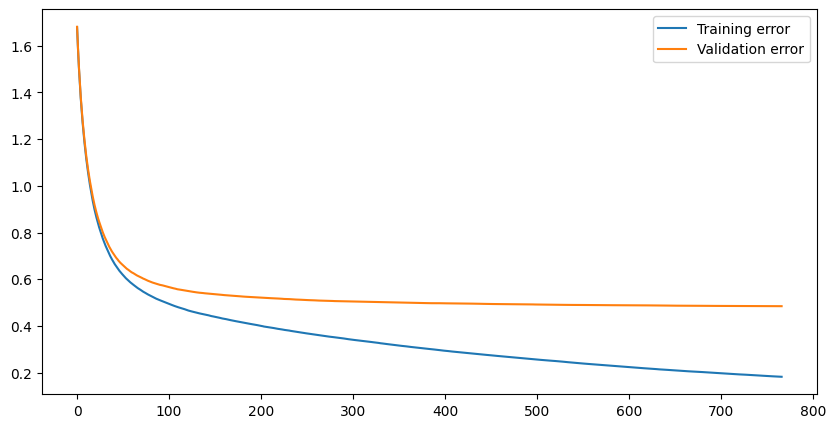

In [65]:
train_errors = clf.get_evals_result()['learn']['MultiClass']
val_errors = clf.get_evals_result()['validation']['MultiClass']

# Plot the errors
plt.figure(figsize=(10, 5))
plt.plot(train_errors, label='Training error')
plt.plot(val_errors, label='Validation error')

plt.legend()
plt.show()

In [27]:
clf.get_evals_result()

{'learn': {'MultiClass': [1.6892125203689583,
   1.605726038122244,
   1.5348988917019726,
   1.4724819997082892,
   1.4169452721663547,
   1.3658262740437295,
   1.3202685206143931,
   1.2803246661937784,
   1.2431222968415063,
   1.20926690350292,
   1.1757152265823847,
   1.1438872724758955,
   1.1167305998715946,
   1.0898476129674906,
   1.0647170643703965,
   1.0419102049292626,
   1.0203749417048589,
   1.0000639265355886,
   0.9812402707157446,
   0.9631241433376657,
   0.9465275514054116,
   0.9298334173584607,
   0.9140773418113644,
   0.900448705119807,
   0.8872297396929756,
   0.8738671957841194,
   0.8610992904462604,
   0.8478870705374192,
   0.8374284928056719,
   0.82597996546353,
   0.8161137705736009,
   0.8068548240199342,
   0.7955915089243185,
   0.7865831518032512,
   0.7772358737625505,
   0.7688206910381588,
   0.7602926631786869,
   0.7526527409887513,
   0.7461568868685033,
   0.7383240874113239,
   0.7305832302196495,
   0.7248001045204064,
   0.717646124519

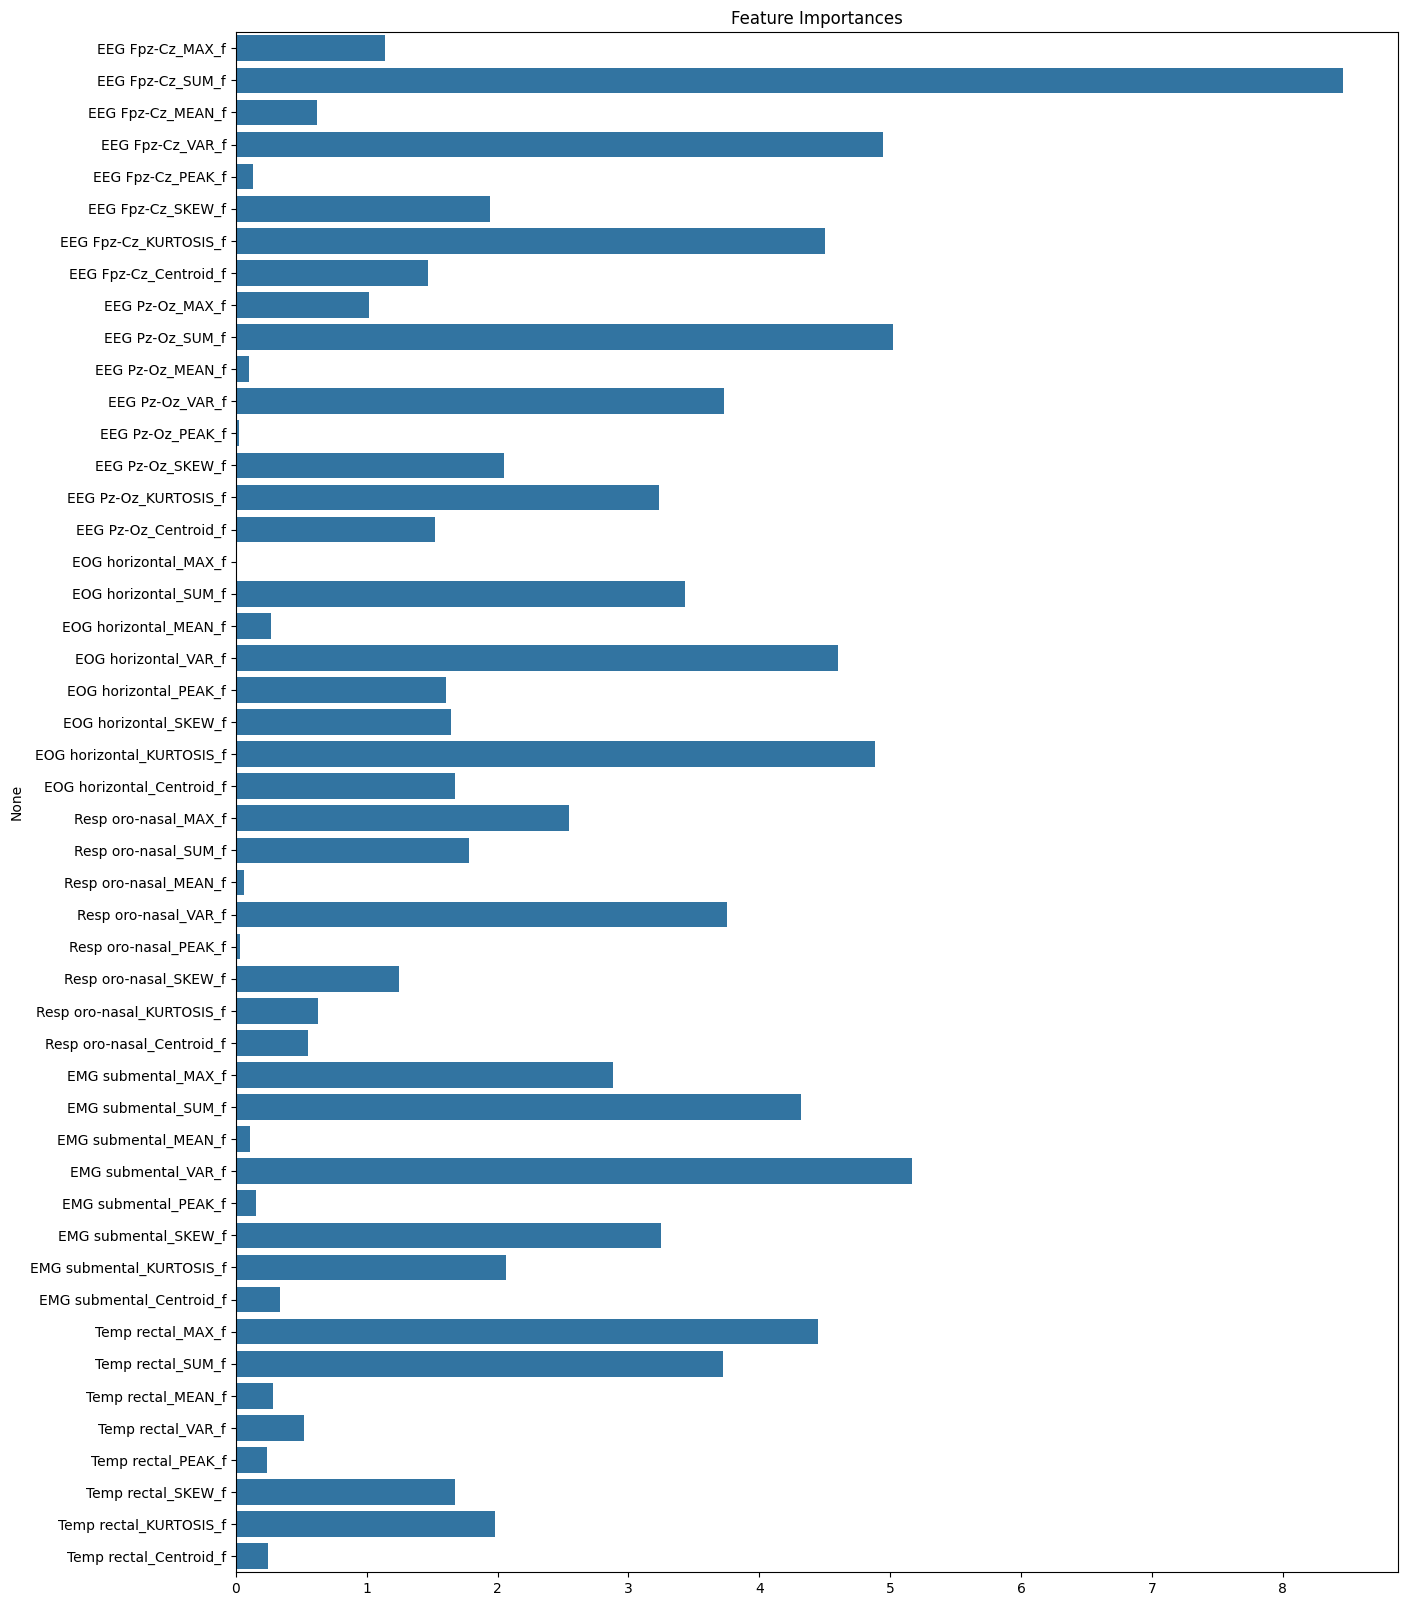

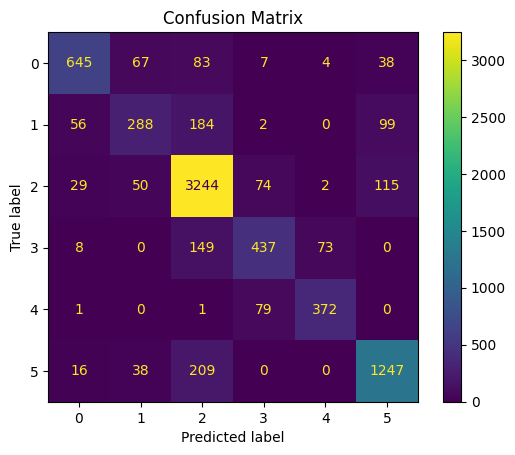

In [71]:
# Feature Importance
feature_importances = clf.get_feature_importance()
plt.figure(figsize=(15, 20))
sns.barplot(x=feature_importances, y=X_train_df.columns)
plt.title('Feature Importances')
plt.show()

# Confusion Matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()